In [1]:
#importing libraries
import numpy as np
import pandas as pd



import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

C:\Users\Sobhan\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
#loading the datasets
books = pd.read_csv("books.csv")
ratings = pd.read_csv("Ratings.csv")
users = pd.read_csv("Users.csv")

In [3]:
#print 1st five rows of books
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
#checking columns
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [5]:
#checking shape
books.shape

(271360, 8)

In [6]:
#checking information
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [7]:
#checking null values
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [8]:
#checking duplicate values
books.duplicated().sum()

0

In [9]:
#summary statistics of the numerical columns
books.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271359,271360,271358,271360,271360,271357
unique,271360,242135,102023,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


In [10]:
#converting Year-Of-Publication values to neumeric
books["Year-Of-Publication"] = pd.to_numeric(books["Year-Of-Publication"], errors = "coerce")
books.dropna(subset = ["Year-Of-Publication"], inplace = True)

In [11]:
books["Year-Of-Publication"]

0         2002.0
1         2001.0
2         1991.0
3         1999.0
4         1999.0
           ...  
271355    1988.0
271356    1991.0
271357    2004.0
271358    1996.0
271359    2000.0
Name: Year-Of-Publication, Length: 271357, dtype: float64

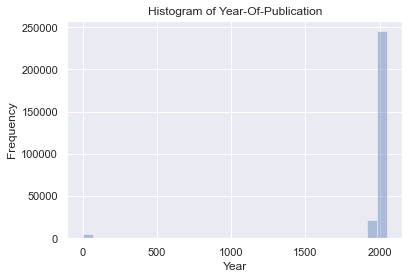

In [12]:
#histogram of the Year-Of-Publication column
sns.set()
sns.distplot(books["Year-Of-Publication"], bins = 30, kde = False)
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.title("Histogram of Year-Of-Publication")
plt.show()

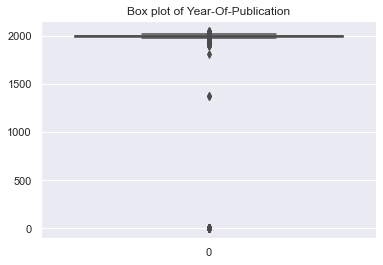

In [13]:
#box plot of the Year-Of-Publication column
sns.boxplot(data = books["Year-Of-Publication"])
plt.title("Box plot of Year-Of-Publication")
plt.show()

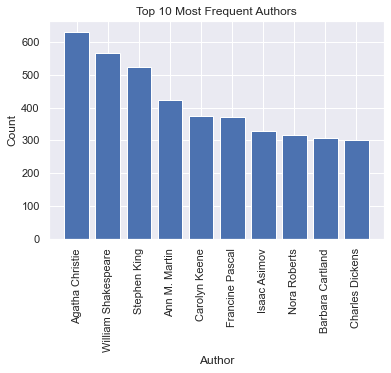

In [14]:
#bar chart of the top 10 most frequent authors
top_authors = books["Book-Author"].value_counts().nlargest(10)
plt.bar(top_authors.index, top_authors.values)
plt.xlabel("Author")
plt.ylabel("Count")
plt.title("Top 10 Most Frequent Authors")
plt.xticks(rotation = 90)
plt.show()

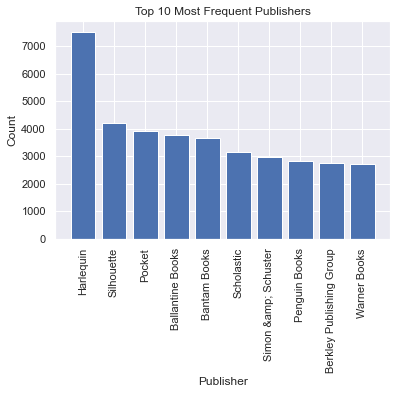

In [15]:
#bar chart of the top 10 most frequent publishers
top_publishers = books["Publisher"].value_counts().nlargest(10)
plt.bar(top_publishers.index, top_publishers.values)
plt.xlabel("Publisher")
plt.ylabel("Count")
plt.title("Top 10 Most Frequent Publishers")
plt.xticks(rotation = 90)
plt.show()

In [16]:
#print 1st five rows of ratings
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [17]:
#checking shape
ratings.shape

(1149780, 3)

In [18]:
#checking information
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [19]:
#checking null values
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [20]:
#checking duplicates values
ratings.duplicated().sum()

0

In [21]:
ratings.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [22]:
ratings["Book-Rating"].value_counts()

0     716109
8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: Book-Rating, dtype: int64

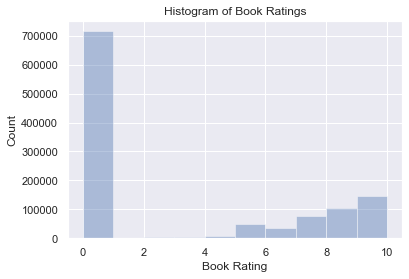

In [23]:
#histogram of the book ratings
sns.distplot(ratings["Book-Rating"], bins = 10, kde = False)
plt.xlabel("Book Rating")
plt.ylabel("Count")
plt.title("Histogram of Book Ratings")
plt.show()

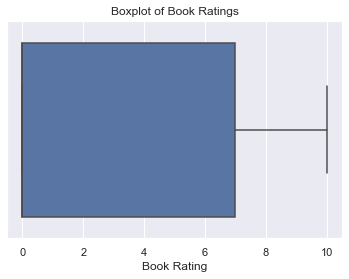

In [24]:
#boxplot of the book ratings
sns.boxplot(x = ratings["Book-Rating"])
plt.xlabel("Book Rating")
plt.title("Boxplot of Book Ratings")
plt.show()

In [25]:
#print 1st five rows of users
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [26]:
#checking shape
users.shape

(278858, 3)

In [27]:
#checking information
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [28]:
#checking null values
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [29]:
#checking duplicates values
users.duplicated().sum()

0

Recommendation System Based on Popularity 

In [30]:
#combine two DataFrames based on a common column named ISBN
names_with_ratings = ratings.merge(books, on = "ISBN")

In [31]:
num_rating_df = names_with_ratings.groupby("Book-Title").count()["Book-Rating"].reset_index() #convert the grouped data into a new DataFrame with an integer index

num_rating_df.rename(columns = {"Book-Rating" : "num_ratings"}, inplace = True) #renaming the Book-Rating column to num_ratings

DataFrame num_rating_df contains the number of ratings for each book title under the column name num_ratings.

In [32]:
#checking new DataFrame
num_rating_df

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241063,Ã?Â?lpiraten.,2
241064,Ã?Â?rger mit Produkt X. Roman.,4
241065,Ã?Â?sterlich leben.,1
241066,Ã?Â?stlich der Berge.,3


In [33]:
avg_rating_df = names_with_ratings.groupby("Book-Title").mean()["Book-Rating"].reset_index()

avg_rating_df.rename(columns = {"Book-Rating" : "avg_ratings"}, inplace = True) #renaming the Book-Rating column to avg_ratings


DataFrame avg_rating_df contains the average rating for each book title under the column name avg_ratings.

In [34]:
#checking new DataFrame
avg_rating_df

,Book-Title,avg_ratings
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241063,Ã?Â?lpiraten.,0.000000
241064,Ã?Â?rger mit Produkt X. Roman.,5.250000
241065,Ã?Â?sterlich leben.,7.000000
241066,Ã?Â?stlich der Berge.,2.666667


In [35]:
popular_df = num_rating_df.merge(avg_rating_df, on = "Book-Title")

DataFrame popular_df contains the number of ratings and average rating for each book title allowing us to analyze the popularity and quality of different books.

In [36]:
popular_df

,Book-Title,num_ratings,avg_ratings
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241063,Ã?Â?lpiraten.,2,0.000000
241064,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241065,Ã?Â?sterlich leben.,1,7.000000
241066,Ã?Â?stlich der Berge.,3,2.666667


Creating dataframe to show the top 50 books that have 300 or more ratings and sorted by average rating in descending order.

In [37]:
popular_df[popular_df["num_ratings"] >= 300].sort_values("avg_ratings", ascending = False).head(50)

,Book-Title,num_ratings,avg_ratings
80432,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80420,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80424,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
80412,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
187374,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370
80443,Harry Potter and the Sorcerer's Stone (Harry P...,575,4.895652
219738,To Kill a Mockingbird,510,4.700000
183570,The Da Vinci Code,898,4.642539
187877,The Five People You Meet in Heaven,430,4.551163
180553,The Catcher in the Rye,449,4.545657


In [38]:
popular_df = popular_df.merge(books, on = "Book-Title").drop_duplicates("Book-Title")[["Book-Title", "Book-Author", "Year-Of-Publication", "num_ratings","avg_ratings", "Image-URL-M"]]

In [39]:
popular_df

,Book-Title,Book-Author,Year-Of-Publication,num_ratings,avg_ratings,Image-URL-M
0,A Light in the Storm: The Civil War Diary of ...,Karen Hesse,1999.0,4,2.250000,http://images.amazon.com/images/P/0590567330.0...
1,Always Have Popsicles,Rebecca Harvin,1994.0,1,0.000000,http://images.amazon.com/images/P/0964147726.0...
2,Apple Magic (The Collector's series),Martina Boudreau,1984.0,1,0.000000,http://images.amazon.com/images/P/0942320093.0...
3,"Ask Lily (Young Women of Faith: Lily Series, ...",Nancy N. Rue,2001.0,1,8.000000,http://images.amazon.com/images/P/0310232546.0...
4,Beyond IBM: Leadership Marketing and Finance ...,Lou Mobley,1989.0,1,0.000000,http://images.amazon.com/images/P/0962295701.0...
...,...,...,...,...,...,...
270288,Ã?Â?lpiraten.,Janwillem van de Wetering,2002.0,2,0.000000,http://images.amazon.com/images/P/3499232499.0...
270289,Ã?Â?rger mit Produkt X. Roman.,Joan Aiken,1987.0,4,5.250000,http://images.amazon.com/images/P/325721538X.0...
270290,Ã?Â?sterlich leben.,Anselm GrÃ?Â¼n,2001.0,1,7.000000,http://images.amazon.com/images/P/3451274973.0...
270291,Ã?Â?stlich der Berge.,David Guterson,2000.0,3,2.666667,http://images.amazon.com/images/P/3442725739.0...


EDA on current Dataset

In [40]:
#checking shape
popular_df.shape

(241068, 6)

In [41]:
#checking information
popular_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241068 entries, 0 to 270292
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Book-Title           241068 non-null  object 
 1   Book-Author          241067 non-null  object 
 2   Year-Of-Publication  241068 non-null  float64
 3   num_ratings          241068 non-null  int64  
 4   avg_ratings          241068 non-null  float64
 5   Image-URL-M          241068 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 12.9+ MB


In [42]:
#checking null values
popular_df.isnull().sum()

Book-Title             0
Book-Author            1
Year-Of-Publication    0
num_ratings            0
avg_ratings            0
Image-URL-M            0
dtype: int64

In [43]:
#checking duplicates values
popular_df.duplicated().sum()

0

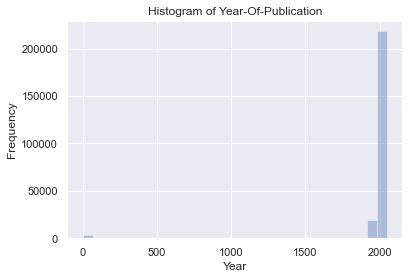

In [44]:
#histogram of the Year-Of-Publication column
sns.distplot(popular_df["Year-Of-Publication"], bins = 30, kde = False)
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.title("Histogram of Year-Of-Publication")
plt.show()

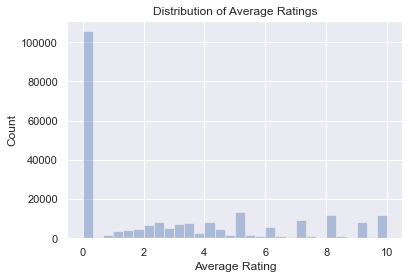

In [45]:
#distribution of the average ratings
sns.distplot(popular_df["avg_ratings"], bins = 30, kde = False)
plt.xlabel("Average Rating")
plt.ylabel("Count")
plt.title("Distribution of Average Ratings")
plt.show()

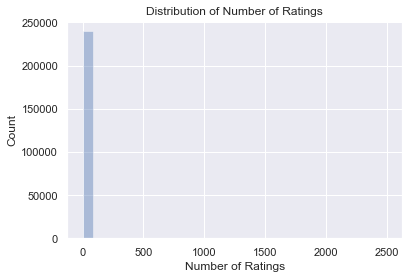

In [46]:
#distribution of the number of ratings
sns.distplot(popular_df["num_ratings"], bins = 30, kde = False)
plt.xlabel("Number of Ratings")
plt.ylabel("Count")
plt.title("Distribution of Number of Ratings")
plt.show()

In [47]:
top_authors = popular_df.groupby("Book-Author")["num_ratings"].sum().nlargest(10)
print(top_authors)

Book-Author
Stephen King          10270
Nora Roberts           8476
James Patterson        5993
John Grisham           5825
Mary Higgins Clark     4844
Dean R. Koontz         4451
Tom Clancy             4046
Sue Grafton            3371
Janet Evanovich        3354
Anne Rice              3087
Name: num_ratings, dtype: int64


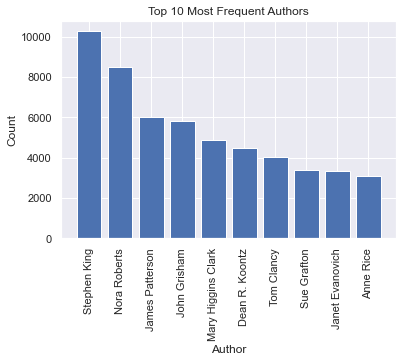

In [48]:
#bar chart of the top 10 most frequent authors
top_authors = popular_df.groupby("Book-Author")["num_ratings"].sum().nlargest(10)
plt.bar(top_authors.index, top_authors.values)
plt.xlabel("Author")
plt.ylabel("Count")
plt.title("Top 10 Most Frequent Authors")
plt.xticks(rotation = 90)
plt.show()

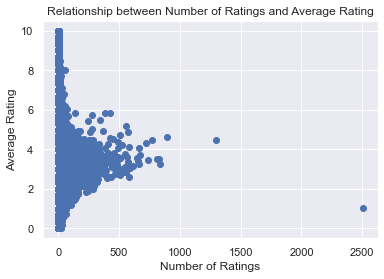

In [49]:
#visualize the relationship between the number of ratings and the average ratings
plt.scatter(popular_df["num_ratings"], popular_df["avg_ratings"])
plt.xlabel("Number of Ratings")
plt.ylabel("Average Rating")
plt.title("Relationship between Number of Ratings and Average Rating")
plt.show()

In [50]:
#top rated books
top_rated_books = popular_df.nlargest(10, "avg_ratings")
print(top_rated_books)

                                            Book-Title  \
6                                         Dark Justice   
61                   'California Historical Landmarks'   
66   'Isms: a dictionary of words ending in -ism, -...   
76                   'Round the Corner (Sister Circle)   
124                  006781: Bk.1 Gags De Boule Et Bil   
147  1,000 Makers of the Millennium: The Men and Wo...   
157  1,001 Computer Hints &amp; Tips: An A-To-Z Gui...   
170  1,001 Things Everyone Should Know About Americ...   
173                      1,001 Ways to Save the Planet   
198  10 American History Plays for the Classroom (G...   

                                           Book-Author  Year-Of-Publication  \
6                                         Jack Higgins               2004.0   
61   California State Parks Office of Historic Pres...                  0.0   
66                                       Eng Sheffield               1972.0   
76                                      Vonet

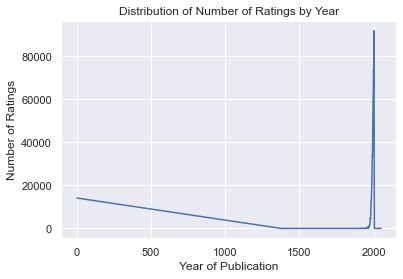

In [51]:
#distribution of the number of ratings by year
ratings_by_year = popular_df.groupby("Year-Of-Publication")["num_ratings"].sum()
ratings_by_year.plot()
plt.xlabel("Year of Publication")
plt.ylabel("Number of Ratings")
plt.title("Distribution of Number of Ratings by Year")
plt.show()

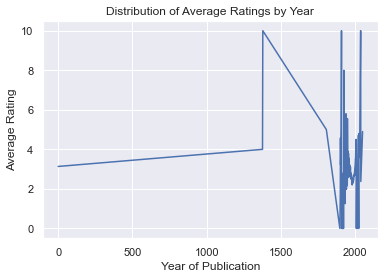

In [52]:
#distribution of the average ratings by year
avg_ratings_by_year = popular_df.groupby("Year-Of-Publication")["avg_ratings"].mean()
avg_ratings_by_year.plot()
plt.xlabel("Year of Publication")
plt.ylabel("Average Rating")
plt.title("Distribution of Average Ratings by Year")
plt.show()

Recommendation System Based on Collaborative Filtering

In [53]:
x = names_with_ratings.groupby("User-ID").count()["Book-Rating"] > 200
educated_users = x[x].index #users who have rated more than 200 books 

In [54]:
filtered_rating = names_with_ratings[names_with_ratings['User-ID'].isin(educated_users)] #contains only the ratings from educated users

In [55]:
filtered_rating

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
5,23768,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
7,28523,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
15,77940,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
16,81977,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...
1030879,275970,1880837927,0,The Theology of the Hammer,Millard Fuller,1994.0,Smyth &amp; Helwys Publishing,http://images.amazon.com/images/P/1880837927.0...,http://images.amazon.com/images/P/1880837927.0...,http://images.amazon.com/images/P/1880837927.0...
1030880,275970,188717897X,0,The Ordeal of Integration: Progress and Resent...,Orlando Patterson,1998.0,Civitas Book Publisher,http://images.amazon.com/images/P/188717897X.0...,http://images.amazon.com/images/P/188717897X.0...,http://images.amazon.com/images/P/188717897X.0...
1030881,275970,1888889047,0,Pushcart's Complete Rotten Reviews &amp; Rejec...,Bill Henderson,1998.0,Pushcart Press,http://images.amazon.com/images/P/1888889047.0...,http://images.amazon.com/images/P/1888889047.0...,http://images.amazon.com/images/P/1888889047.0...
1030882,275970,1931868123,0,There's a Porcupine in My Outhouse: Misadventu...,Mike Tougias,2002.0,Capital Books (VA),http://images.amazon.com/images/P/1931868123.0...,http://images.amazon.com/images/P/1931868123.0...,http://images.amazon.com/images/P/1931868123.0...


In [56]:
y = filtered_rating.groupby("Book-Title").count()["Book-Rating"] >= 50  #books that have 50 or more ratings
famous_books = y[y].index

In [57]:
famous_books

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Day Late and a Dollar Short', 'A Fine Balance',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=706)

In [58]:
final_ratings = filtered_rating[filtered_rating["Book-Title"].isin(famous_books)]

In [59]:
final_ratings

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
63,278418,0446520802,0,The Notebook,Nicholas Sparks,1996.0,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
65,3363,0446520802,0,The Notebook,Nicholas Sparks,1996.0,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
66,7158,0446520802,10,The Notebook,Nicholas Sparks,1996.0,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
69,11676,0446520802,10,The Notebook,Nicholas Sparks,1996.0,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
74,23768,0446520802,6,The Notebook,Nicholas Sparks,1996.0,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
...,...,...,...,...,...,...,...,...,...,...
1026720,266865,0531001725,10,The Catcher in the Rye,Jerome David Salinger,1973.0,Scholastic Library Pub,http://images.amazon.com/images/P/0531001725.0...,http://images.amazon.com/images/P/0531001725.0...,http://images.amazon.com/images/P/0531001725.0...
1027919,269566,0670809381,0,Echoes,Maeve Binchy,1986.0,Penguin USA,http://images.amazon.com/images/P/0670809381.0...,http://images.amazon.com/images/P/0670809381.0...,http://images.amazon.com/images/P/0670809381.0...
1028773,271284,0440910927,0,The Rainmaker,John Grisham,1995.0,Island,http://images.amazon.com/images/P/0440910927.0...,http://images.amazon.com/images/P/0440910927.0...,http://images.amazon.com/images/P/0440910927.0...
1029066,271705,B0001PIOX4,0,Fahrenheit 451,Ray Bradbury,1993.0,Simon &amp; Schuster,http://images.amazon.com/images/P/B0001PIOX4.0...,http://images.amazon.com/images/P/B0001PIOX4.0...,http://images.amazon.com/images/P/B0001PIOX4.0...


In [60]:
pivot_table = final_ratings.pivot_table(index = "Book-Title",columns = "User-ID", values = "Book-Rating")

In [61]:
pivot_table

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Bend in the Road,0.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,9.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [62]:
pivot_table.fillna(0, inplace = True)

In [63]:
pivot_table

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
from sklearn.metrics.pairwise import cosine_similarity

In [65]:
similarity_scores = cosine_similarity(pivot_table)

In [66]:
similarity_scores

array([[1.        , 0.10255025, 0.01220856, ..., 0.12110367, 0.07347567,
        0.04316046],
       [0.10255025, 1.        , 0.2364573 , ..., 0.07446129, 0.16773875,
        0.14263397],
       [0.01220856, 0.2364573 , 1.        , ..., 0.04558758, 0.04938579,
        0.10796119],
       ...,
       [0.12110367, 0.07446129, 0.04558758, ..., 1.        , 0.07085128,
        0.0196177 ],
       [0.07347567, 0.16773875, 0.04938579, ..., 0.07085128, 1.        ,
        0.10602962],
       [0.04316046, 0.14263397, 0.10796119, ..., 0.0196177 , 0.10602962,
        1.        ]])

In [67]:
similarity_scores.shape

(706, 706)

In [68]:
np.where(pivot_table.index == "You Belong To Me")[0][0]

702

In [69]:
sorted(list(enumerate(similarity_scores[0])),key = lambda x:x[1],reverse = True)[1:5]

[(47, 0.2702651417103732),
 (545, 0.26396193711234966),
 (82, 0.2366937434740099),
 (634, 0.23299389358170397)]

In [75]:
def recommend_books(book_name):
    
    #fetch index
    index = np.where(pivot_table.index == book_name)[0][0]
    
    similar_items = sorted(list(enumerate(similarity_scores[index])),key = lambda x:x[1],reverse=True)[1:10]
    
    data = []
    for i in similar_items:
        
        item = []
        temp_df = books[books["Book-Title"] == pivot_table.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates("Book-Title")["Book-Title"].values))
        item.extend(list(temp_df.drop_duplicates("Book-Title")["Book-Author"].values))
        #item.extend(list(temp_df.drop_duplicates("Book-Title")["Year-Of-Publication"].values))
        item.extend(list(temp_df.drop_duplicates("Book-Title")["Image-URL-M"].values))
        
        data.append(item)
    
    return data

In [76]:
recommend_books("The Hobbit : The Enchanting Prelude to The Lord of the Rings")

[['The Two Towers (The Lord of the Rings, Part 2)',
  'J.R.R. TOLKIEN',
  'http://images.amazon.com/images/P/0345339711.01.MZZZZZZZ.jpg'],
 ['The Fellowship of the Ring (The Lord of the Rings, Part 1)',
  'J.R.R. TOLKIEN',
  'http://images.amazon.com/images/P/0345339703.01.MZZZZZZZ.jpg'],
 ['Where the Red Fern Grows',
  'Wilson Rawls',
  'http://images.amazon.com/images/P/0553274295.01.MZZZZZZZ.jpg'],
 ['One for the Money (A Stephanie Plum Novel)',
  'Janet Evanovich',
  'http://images.amazon.com/images/P/0312990456.01.MZZZZZZZ.jpg'],
 ['The Return of the King (The Lord of the Rings, Part 3)',
  'J.R.R. TOLKIEN',
  'http://images.amazon.com/images/P/0345339738.01.MZZZZZZZ.jpg'],
 ['The English Patient',
  'Michael Ondaatje',
  'http://images.amazon.com/images/P/0679745203.01.MZZZZZZZ.jpg'],
 ['The Cider House Rules',
  'John Irving',
  'http://images.amazon.com/images/P/0553258001.01.MZZZZZZZ.jpg'],
 ['Morality for Beautiful Girls (No.1 Ladies Detective Agency)',
  'Alexander McCall Sm

In [72]:
import pickle
pickle.dump(popular_df,open("popular.pkl","wb"))

In [77]:
pickle.dump(pivot_table,open("pt.pkl","wb"))
pickle.dump(books,open("books.pkl","wb"))
pickle.dump(similarity_scores,open("similarity_scores.pkl","wb"))

In [73]:
#books.drop_duplicates("Book-Title")